In [427]:
from pulp import *
import pandas as pd

In [497]:
ht=pd.read_csv('./hashtag_auction.csv', index_col=0)
#ht = ht.apply(pd.to_numeric, errors='ignore')
ht = ht.replace({'\$': ''}, regex=True)
ht = ht.apply(pd.to_numeric, errors='ignore')
ht = ht.fillna(0)
ht.loc[ht['Y! AVG']<1.0, 'Y! AVG'] = 1.0
# SCALE HT
# SCALE AA
# AVG
ratio = .020666667

In [316]:
nn=10
ab= ht.iloc[:nn*13, 5].sum()/nn/200
nn=12
bc =ht.iloc[:nn*13, 5].sum()/nn/200
# nn=14
# cc =ht.iloc[:nn*13, 5].sum()/nn/200
.53*ab+.47*bc


0.20601108333333334

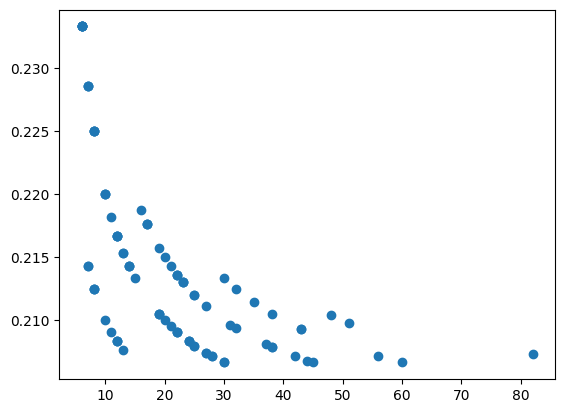

PLAYER    POS TEAM  GP   MPG  TOTAL  VALUED AT  Y! AVG  \
R#                                                                            
92               Al Horford   PF,C  BOS  67  27.1    1.4        6.0     4.5   
91             Jakob Poeltl      C  SAS  68  28.7    1.4        6.0    10.1   
90             Kelly Olynyk      C  UTA  70  26.0    1.4        6.0     1.7   
89         D'Angelo Russell  PG,SG  MIN  65  32.0    1.4        6.0     9.7   
88                Tre Jones     PG  SAS  71  30.0    1.4        6.0     3.3   
87       Isaiah Hartenstein      C  NYK  69  21.1    1.4        6.0     1.4   
84           Gary Trent Jr.  PG,SG  TOR  70  35.0    1.6        7.0     4.8   
83              Jalen Smith   PF,C  IND  72  28.1    1.6        7.0     4.4   
82          Robert Williams      C  BOS  50  28.4    1.6        7.0    17.5   
77               OG Anunoby  SG,SF  TOR  67  36.0    1.8        8.0    13.8   
75             Monte Morris     PG  WAS  72  28.0    1.8        8.0     3.9   
76              Brook Lopez      C  MIL  70  26.7    1.8        8.0     2.1   
78         Robert Covington  SF,PF  LAC  72  26.0    1.8        8.0     1.7   
73              Tyler Herro  PG,SG  MIA  68  33.3    2.2       10.0     7.7   
72             Jerami Grant     PF  POR  70  33.9    2.2       10.0     6.8   
71              Buddy Hield  SG,SF  IND  78  30.4    2.2       10.0     5.6   
54              Ivica Zubac      C  LAC  76  28.0    3.5       16.0     4.5   
69             JaVale McGee      C  DAL  76  22.2    2.4       11.0     1.4   
51             Tyrese Maxey  PG,SG  PHI  74  35.4    3.7       17.0    11.8   
53              Evan Mobley   PF,C  CLE  70  34.8    3.7       17.0    24.0   
52           Scottie Barnes  SF,PF  TOR  74  35.4    3.7       17.0    20.0   
65      Dorian Finney-Smith  SF,PF  DAL  80  32.1    2.6       12.0     2.7   
64            Devin Vassell  SG,SF  SAS  71  31.3    2.6       12.0     6.6   
63           Alperen Sengun      C  HOU  76  30.1    2.6       12.0    11.4   
62              CJ McCollum  PG,SG  NOP  69  34.7    2.6       12.0    17.2   
47       Kristaps Porzingis   PF,C  WAS  60  29.4    4.1       19.0    21.4   
60               Kyle Lowry     PG  MIA  65  34.2    2.8       13.0     3.2   
59            Julius Randle     PF  NYK  72  34.6    2.8       13.0    13.2   
45             Jimmy Butler  SF,PF  MIA  58  33.9    4.3       20.0    31.6   
43          Cade Cunningham  PG,SG  DET  72  33.8    4.5       21.0    28.4   
57            Jalen Brunson  PG,SG  NYK  77  33.9    3.0       14.0    10.4   
58               Saddiq Bey  SF,PF  DET  80  33.4    3.0       14.0     4.6   
56            PJ Washington   PF,C  CHA  72  30.6    3.0       14.0     4.1   
85           Christian Wood   PF,C  DAL  72  29.6    1.5        7.0    13.1   
86           Draymond Green   PF,C  GSW  64  28.8    1.5        7.0     8.2   
37         Donovan Mitchell  PG,SG  CLE  70  33.9    4.7       22.0    33.1   
39            Fred VanVleet     PG  TOR  65  36.7    4.7       22.0    30.6   
38        Jonas Valanciunas      C  NOP  74  30.0    4.7       22.0    17.2   
55             Franz Wagner  SF,PF  ORL  80  31.2    3.2       15.0     8.1   
19              LaMelo Ball  PG,SG  CHA  65  33.4    6.4       30.0    49.2   
34            Mikal Bridges  SG,SF  PHX  80  34.9    4.9       23.0    11.5   
35             Jordan Poole  PG,SG  GSW  77  30.1    4.9       23.0    10.5   
36             Bradley Beal     SG  WAS  68  35.6    4.9       23.0    28.0   
16              Bam Adebayo      C  MIA  72  33.6    6.8       32.0    33.8   
79           Paolo Banchero     PF  ORL  73  31.8    1.7        8.0     9.5   
80           Keldon Johnson  SF,PF  SAS  71  33.5    1.7        8.0     8.3   
81             Marcus Smart  PG,SG  BOS  70  31.4    1.7        8.0     5.0   
28             Myles Turner      C  IND  68  30.3    5.3       25.0    22.4   
27            Kawhi Leonard  SG,SF  LAC  60  32.0    5.3       25.0    

In [335]:
import matplotlib.pyplot as plt 

woo = ht.loc[ht['TOTAL']>1.3].copy()
woo['rats'] = woo['TOTAL']/woo['VALUED AT']
plt.scatter(woo['VALUED AT'], woo['rats'])
plt.show()
woo.sort_values('rats', ascending=False)


In [499]:
ht=ht.set_index('PLAYER')
ht = ht.join(evs, how='inner')
ht=ht.reset_index()
evs=evs.iloc[:,:2]
ht.rename({'index':'PLAYER'}, inplace=True, axis=1)

In [500]:
ht

PLAYER    POS TEAM  GP   MPG  TOTAL  VALUED AT  Y! AVG  \
0                Nikola Jokic      C  DEN  74  33.5   17.0       82.0    72.6   
1                Kevin Durant  SF,PF  BRO  68  35.7   12.4       60.0    63.1   
2                 Joel Embiid   PF,C  PHI  68  33.8   11.6       56.0    64.0   
3                James Harden  PG,SG  PHI  70  36.4   10.7       51.0    52.8   
4                  Trae Young     PG  ATL  76  34.2   10.1       48.0    57.1   
5           Tyrese Haliburton  PG,SG  IND  75  34.7    9.3       45.0    42.7   
6       Giannis Antetokounmpo   PF,C  MIL  68  32.8    9.1       44.0    62.7   
7                Jayson Tatum  SF,PF  BOS  74  36.0    9.0       43.0    56.4   
8                LeBron James  SF,PF  LAL  68  33.4    9.0       43.0    46.4   
9          Karl-Anthony Towns   PF,C  MIN  70  33.5    8.7       42.0    57.2   
10              DeMar DeRozan  SF,PF  CHI  77  35.7    8.0       38.0    29.6   
11                Luka Doncic  PG,SG  DAL  69  35.4    7.9       38.0    61.2   
12              Stephen Curry     PG  GSW  64  34.4    7.9       38.0    61.1   
13             Damian Lillard     PG  POR  68  36.5    7.7       37.0    43.9   
14               Devin Booker  SG,SF  PHX  70  34.5    7.4       35.0    38.2   
15                Bam Adebayo      C  MIA  72  33.6    6.8       32.0    33.8   
16                Paul George  SF,PF  LAC  68  34.1    6.7       32.0    35.3   
17              Anthony Davis   PF,C  LAL  64  35.1    6.5       31.0    43.1   
18                LaMelo Ball  PG,SG  CHA  65  33.4    6.4       30.0    49.2   
19             Darius Garland     PG  CLE  72  35.2    6.2       30.0    33.1   
20            Khris Middleton  SF,PF  MIL  68  32.4    6.2       30.0    20.8   
21           Domantas Sabonis   PF,C  SAC  69  34.5    5.8       28.0    34.0   
22               Kyrie Irving  PG,SG  BRO  59  36.4    5.8       28.0    43.7   
23              Jarrett Allen      C  CLE  73  32.3    5.7       27.0    20.9   
24                Rudy Gobert      C  MIN  71  32.1    5.6       27.0    32.1   
25               Desmond Bane  SG,SF  MEM  76  30.1    5.6       27.0    17.1   
26              Kawhi Leonard  SG,SF  LAC  60  32.0    5.3       25.0    33.3   
27               Myles Turner      C  IND  68  30.3    5.3       25.0    22.4   
28               Terry Rozier  PG,SG  CHA  73  34.1    5.2       25.0    16.4   
29             Nikola Vucevic      C  CHI  74  31.7    5.2       25.0    26.0   
30                 Chris Paul     PG  PHX  65  31.4    5.0       24.0    26.2   
31                Zach LaVine  SG,SF  CHI  70  34.2    5.0       24.0    23.8   
32               Jrue Holiday  PG,SG  MIL  67  32.9    5.0       24.0    22.6   
33              Mikal Bridges  SG,SF  PHX  80  34.9    4.9       23.0    11.5   
34               Jordan Poole  PG,SG  GSW  77  30.1    4.9       23.0    10.5   
35               Bradley Beal     SG  WAS  68  35.6    4.9       23.0    28.0   
36           Donovan Mitchell  PG,SG  CLE  70  33.9    4.7       22.0    33.1   
37          Jonas Valanciunas      C  NOP  74  30.0    4.7       22.0    17.2   
38              Fred VanVleet     PG  TOR  65  36.7    4.7       22.0    30.6   
39    Shai Gilgeous-Alexander  PG,SG  OKL  64  34.7    4.6       22.0    24.6   
40              Deandre Ayton      C  PHX  70  30.7    4.6       22.0    23.7   
41            Anthony Edwards  SG,SF  MIN  72  35.2    4.6       22.0    33.4   
42            Cade Cunningham  PG,SG  DET  72  33.8    4.5       21.0    28.4   
43              Pascal Siakam   PF,C  TOR  70  37.2    4.4       21.0    29.7   
44               Jimmy Butler  SF,PF  MIA  58  33.9    4.3       20.0    31.6   
45                  Ja Morant     PG  MEM  67  33.0    4.2       20.0    37.6   
46         Kristaps Porzingis   PF,C  WAS  60  29.4    4.1       19.0    21.4   
47            Dejounte Murray  PG,SG  ATL  70  33.8    4.0       19.0    38.8   
48               Jaylen Brown  SG,SF  BOS  71  34.0   

In [341]:
# evs = pd.read_csv('evs.csv', index_col=0)
# evs

ev  win_perc    ADP    POS TEAM  GP   MPG  3PM  \
Nikola Jokic              5.464     71.65    1.3      C  DEN  74  33.5  1.2   
Joel Embiid               5.232     66.48    3.4   PF,C  PHI  68  33.8  1.3   
Kevin Durant              5.215     66.27    4.9  SF,PF  BRO  68  35.7  2.1   
Giannis Antetokounmpo     5.223     66.36    3.3   PF,C  MIL  68  32.8  1.1   
James Harden              5.076     62.71    8.2  PG,SG  PHI  70  36.4  2.3   
Luka Doncic               5.211     67.03    4.3  PG,SG  DAL  69  35.4  3.2   
LeBron James              5.161     65.20   16.1  SF,PF  LAL  68  33.4  2.7   
Trae Young                4.937     59.89    9.6     PG  ATL  76  34.2  3.0   
Stephen Curry             5.107     64.15    6.2     PG  GSW  64  34.4  4.6   
Jayson Tatum              5.034     61.97    8.0  SF,PF  BOS  74  36.0  3.1   
Damian Lillard            4.994     61.67   14.6     PG  POR  68  36.5  3.5   
Karl-Anthony Towns        4.959     59.93    9.4   PF,C  MIN  70  33.5  2.2   
Kyrie Irving              4.969     60.36   16.9  PG,SG  BRO  59  36.4  3.1   
Anthony Davis             4.964     59.54   17.3   PF,C  LAL  64  35.1  0.3   
DeMar DeRozan             4.732     54.19   31.3  SF,PF  CHI  77  35.7  0.7   
Devin Booker              4.922     59.45   15.9  SG,SF  PHX  70  34.5  2.8   
Jimmy Butler              4.780     54.77   30.0  SF,PF  MIA  58  33.9  0.5   
Kawhi Leonard             4.871     57.66   25.0  SG,SF  LAC  60  32.0  1.7   
Shai Gilgeous-Alexander   4.790     55.82   49.3  PG,SG  OKL  64  34.7  1.6   
Paul George               4.832     57.07   20.4  SF,PF  LAC  68  34.1  2.9   
Ja Morant                 4.804     56.28   19.0     PG  MEM  67  33.0  1.6   
LaMelo Ball               5.027     61.43   11.8  PG,SG  CHA  65  33.4  3.0   
Tyrese Haliburton         4.912     58.06   14.3  PG,SG  IND  75  34.7  2.2   
Bam Adebayo               4.759     53.91   21.9      C  MIA  72  33.6  0.0   
Kristaps Porzingis        4.820     55.46   47.1   PF,C  WAS  60  29.4  1.6   
Khris Middleton           4.796     55.77   52.1  SF,PF  MIL  68  32.4  2.5   
Bradley Beal              4.718     54.20   35.7     SG  WAS  68  35.6  2.1   
Domantas Sabonis          4.826     55.60   24.0   PF,C  SAC  69  34.5  0.6   
Zach LaVine               4.721     54.59   40.6  SG,SF  CHI  70  34.2  2.8   
Darius Garland            4.714     53.14   29.3     PG  CLE  72  35.2  2.4   
Pascal Siakam             4.781     54.92   28.5   PF,C  TOR  70  37.2  1.1   
Fred VanVleet             4.880     57.82   27.1     PG  TOR  65  36.7  3.6   
Donovan Mitchell          4.735     54.67   24.6  PG,SG  CLE  70  33.9  3.2   
Zion Williamson           4.475     47.94   37.0     PF  NOP  61  33.1  0.2   
Rudy Gobert               4.668     51.72   28.1      C  MIN  71  32.1  0.0   
Jaylen Brown              4.691     53.59   39.2  SG,SF  BOS  71  34.0  2.6   
De'Aaron Fox              4.635     51.57   45.9     PG  SAC  67  35.4  1.5   
Chris Paul                4.718     52.81   35.2     PG  PHX  65  31.4  1.0   
Jrue Holiday              4.753     54.15   43.3  PG,SG  MIL  67  32.9  2.0   
Anthony Edwards           4.660     52.61   20.1  SG,SF  MIN  72  35.2  3.1   
Jarrett Allen             4.636     50.86   42.2      C  CLE  73  32.3  0.0   
Terry Rozier              4.817     56.45   47.5  PG,SG  CHA  73  34.1  3.1   
Brandon Ingram            4.597     51.02   51.5  SF,PF  NOP  62  34.1  1.4   
Cade Cunningham           4.643     51.66   32.5  PG,SG  DET  72  33.8  2.0   
Deandre Ayton             4.595     50.26   37.7      C  PHX  70  30.7  0.1   
Myles Turner              4.681     51.63   39.7      C  IND  68  30.3  1.6   
Dejounte Murray           4.660     52.06   21.1  PG,SG  ATL  70  33.8  1.2   
Jaren Jackson Jr.         4.558     48.60  107.4   PF,C  MEM  44  27.0  1.6   
Jonas Valanciunas         4.555     49.08   52.7      C  NOP  74  30.0  0.8   
Desmond Bane              4.661     52.90   50.2  SG,SF  MEM  76  30.1  3.1   


In [593]:
ht

PLAYER    POS TEAM  GP   MPG  TOTAL  VALUED AT  Y! AVG  \
0                Nikola Jokic      C  DEN  74  33.5   17.0       82.0    88.0   
1                Kevin Durant  SF,PF  BRO  68  35.7   12.4       60.0    63.1   
2                 Joel Embiid   PF,C  PHI  68  33.8   11.6       56.0    64.0   
3                James Harden  PG,SG  PHI  70  36.4   10.7       51.0    52.8   
4                  Trae Young     PG  ATL  76  34.2   10.1       48.0    57.1   
5           Tyrese Haliburton  PG,SG  IND  75  34.7    9.3       45.0    42.7   
6       Giannis Antetokounmpo   PF,C  MIL  68  32.8    9.1       44.0    62.7   
7                Jayson Tatum  SF,PF  BOS  74  36.0    9.0       43.0    56.4   
8                LeBron James  SF,PF  LAL  68  33.4    9.0       43.0    56.0   
9          Karl-Anthony Towns   PF,C  MIN  70  33.5    8.7       42.0    57.2   
10              DeMar DeRozan  SF,PF  CHI  77  35.7    8.0       38.0    29.6   
11                Luka Doncic  PG,SG  DAL  69  35.4    7.9       38.0    61.2   
12              Stephen Curry     PG  GSW  64  34.4    7.9       38.0    61.1   
13             Damian Lillard     PG  POR  68  36.5    7.7       37.0    43.9   
14               Devin Booker  SG,SF  PHX  70  34.5    7.4       35.0    38.2   
15                Bam Adebayo      C  MIA  72  33.6    6.8       32.0    33.8   
16                Paul George  SF,PF  LAC  68  34.1    6.7       32.0    35.3   
17              Anthony Davis   PF,C  LAL  64  35.1    6.5       31.0    43.1   
18                LaMelo Ball  PG,SG  CHA  65  33.4    6.4       30.0    49.2   
19             Darius Garland     PG  CLE  72  35.2    6.2       30.0    33.1   
20            Khris Middleton  SF,PF  MIL  68  32.4    6.2       30.0    20.8   
21           Domantas Sabonis   PF,C  SAC  69  34.5    5.8       28.0    34.0   
22               Kyrie Irving  PG,SG  BRO  59  36.4    5.8       28.0    43.7   
23              Jarrett Allen      C  CLE  73  32.3    5.7       27.0    20.9   
24                Rudy Gobert      C  MIN  71  32.1    5.6       27.0    32.1   
25               Desmond Bane  SG,SF  MEM  76  30.1    5.6       27.0    17.1   
26              Kawhi Leonard  SG,SF  LAC  60  32.0    5.3       25.0    33.3   
27               Myles Turner      C  IND  68  30.3    5.3       25.0    22.4   
28               Terry Rozier  PG,SG  CHA  73  34.1    5.2       25.0    16.4   
29             Nikola Vucevic      C  CHI  74  31.7    5.2       25.0    26.0   
30                 Chris Paul     PG  PHX  65  31.4    5.0       24.0    26.2   
31                Zach LaVine  SG,SF  CHI  70  34.2    5.0       24.0    23.8   
32               Jrue Holiday  PG,SG  MIL  67  32.9    5.0       24.0    22.6   
33              Mikal Bridges  SG,SF  PHX  80  34.9    4.9       23.0    11.5   
34               Jordan Poole  PG,SG  GSW  77  30.1    4.9       23.0    10.5   
35               Bradley Beal     SG  WAS  68  35.6    4.9       23.0    28.0   
36           Donovan Mitchell  PG,SG  CLE  70  33.9    4.7       22.0    33.1   
37          Jonas Valanciunas      C  NOP  74  30.0    4.7       22.0    17.2   
38              Fred VanVleet     PG  TOR  65  36.7    4.7       22.0    30.6   
39    Shai Gilgeous-Alexander  PG,SG  OKL  64  34.7    4.6       22.0    24.6   
40              Deandre Ayton      C  PHX  70  30.7    4.6       22.0    23.7   
41            Anthony Edwards  SG,SF  MIN  72  35.2    4.6       22.0    33.4   
42            Cade Cunningham  PG,SG  DET  72  33.8    4.5       21.0    28.4   
43              Pascal Siakam   PF,C  TOR  70  37.2    4.4       21.0    29.7   
44               Jimmy Butler  SF,PF  MIA  58  33.9    4.3       20.0    31.6   
45                  Ja Morant     PG  MEM  67  33.0    4.2       20.0    37.6   
46         Kristaps Porzingis   PF,C  WAS  60  29.4    4.1       19.0    21.4   
47            Dejounte Murray  PG,SG  ATL  70  33.8    4.0       19.0    38.8   
48               Jaylen Brown  SG,SF  BOS  71  34.0   

In [81]:
aa=pd.read_csv('./zscores.csv', index_col=0)

In [89]:
aa['Name'] = aa['FirstName'] + ' ' + aa['LastName']
aa = aa.sort_values('Z_Sum', ascending=False)
aa.loc[aa['ProjSalary']==0, 'ProjSalary']=1
aa['Z_Sum'] = ((aa['Z_Sum'] - aa['Z_Sum'].min()) / (aa['Z_Sum'].max() - aa['Z_Sum'].min()))*15
aa['Z_Sum']+=.01
aa['ratio'] = aa['Z_Sum']/ aa['ProjSalary']
aa.sort_values('ratio', ascending=False)

FG_PCT_ADJ  FT_PCT_ADJ      3PTM       PTS       REB       AST        ST  \
138    0.379331   -0.665256 -0.142888  0.237627  0.489450  0.013720  0.518204   
114   -1.200232   -0.104615  0.727162 -0.201958 -0.051593 -0.025516  1.784485   
142    1.985828   -1.280540 -1.433930 -0.298892  1.743957 -1.039117 -1.285288   
106   -0.251756    1.132786  0.460534  0.656923  0.394322 -0.195539 -0.441101   
121   -0.239278   -0.425266  1.330584  0.036995  0.376485 -0.437496  0.940297   
109   -1.499080    1.188333  0.432468  0.275949  0.120828  0.994625 -0.709706   
125   -0.760992    0.230418  0.586831  0.465309 -0.277523 -0.300169  0.633320   
107    0.012648    0.510970  0.516666  0.167744 -0.693710  1.164648 -0.057379   
120   -0.242130    0.321998 -1.055037 -0.359758 -0.717492  1.060018  0.710064   
165   -0.893360    0.954525  0.825393 -0.037396 -0.539126 -0.411338  0.940297   
124   -0.274133    0.381261  1.372683  0.217338 -0.134830 -0.509429  0.211226   
113   -0.113638    0.075448 -1.069070 -0.014853 -0.485616  1.975529  0.710064   
140   -1.158708   -0.310083  2.018204  0.447275 -0.919640 -0.280551  0.633320   
128    1.067118   -2.638066 -1.476029 -0.857954  2.290946  0.118350  0.172854   
149   -0.313731   -0.075741 -0.311285 -0.386809  0.126773 -1.006420  0.825181   
123   -0.539548    0.315268  0.404401  0.147455 -0.325087 -0.385181  0.518204   
126   -1.007374    0.630459  0.123740  0.796688 -0.854239 -0.149764  0.594948   
110   -0.626991    0.071054  0.320203 -0.125313 -0.176449  0.379925 -0.364356   
147    0.031158    0.584479  0.881526 -0.048667 -0.985041  0.111811 -0.402728   
141   -0.318713    0.118085  1.049922 -0.008090 -0.598581 -0.018976 -0.249240   
170   -0.339302    0.193852  0.839426 -0.107279 -0.729383 -0.051673 -0.210868   
116   -0.857374    0.728202  0.488600 -0.301147 -0.634255  0.321070 -0.287612   
184    1.024858   -1.193169 -1.111169 -0.731714  0.608361 -1.058735 -0.978311   
119    0.600678   -0.829953 -0.353384 -0.023870  0.370540 -0.215157 -0.824822   
115   -0.700085   -0.027009 -0.423549 -0.997720 -0.699656  0.412622  2.168207   
211   -1.318004    0.599274  0.460534 -0.247044 -0.033756  0.007181  0.518204   
172    0.662499   -0.210644 -1.153269 -0.952634 -0.866130  1.138491  1.017042   
169   -1.095854    0.199982  0.348269 -0.724952 -0.093211 -0.640216  1.324019   
112   -1.248442    0.892070  0.895559  0.341323 -0.628309 -0.705609 -0.287612   
144    1.183081   -0.094717 -0.381450 -0.059939  0.055427 -0.712149 -1.131800   
118   -0.787131   -0.165629 -0.479682 -0.549118 -1.038551  0.693814 -0.287612   
205   -1.018953    0.425140 -0.128855 -0.305655 -0.836403  0.988085 -0.479473   
145   -0.745590   -0.590336  0.123740 -0.039650 -1.151516  0.739590  0.364715   
166   -1.225797    1.308897  0.488600 -0.163636 -0.735329  0.360307 -0.402728   
111    0.150543    0.016854 -0.451615 -0.497269  0.602416 -1.267995 -0.671334   
162   -1.249475    0.145447  1.428815  0.330052 -0.551017 -0.326326  0.134482   
108   -0.310149    0.685163 -0.241119 -0.251553 -0.729383  0.419161 -0.632961   
132    2.033658   -0.618553 -1.476029 -0.776800  0.067318 -1.006420 -1.400405   
180   -0.118967   -0.428668 -0.591946 -0.819631 -1.151516  0.321070  2.321695   
130   -0.743694   -1.357921  1.218319  0.271441 -0.307251 -0.842936  0.633320   
213   -0.226433    0.235809  0.993790 -0.456692 -0.271577 -0.790621  0.211226   
131   -0.354483    0.114557 -0.030624 -1.078874  0.067318 -0.306708  0.479831   
190   -0.995190    0.081209  0.264071 -0.767783 -0.087266 -0.614058  1.170530   
150    0.784539   -2.139686 -1.476029 -1.022517  1.488299 -0.646755  0.249598   
176   -0.833434   -0.802972 -0.269186 -0.404844  0.537015 -0.757924 -0.134123   
206   -0.773634   -0.207053 -0.227086 -0.925583 -0.717492  0.393003  0.211226   
152   -0.858638    0.608136  0.797327 -0.332707  0.537015 -0.313248 -1.630638   
137    0.165478   -1.065472 -0.465648 -0.188433 -0.241850 -0.836397  0.019365   
186    1.158810   -0.325235 -1.20940

In [208]:
# list of zscores
# players = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
players = aa['Name'].values
zs = aa['Z_Sum'].values*-1
# zs = [9, 5, 10, 1, -1, 3, 5, 7, 12]
# zs = [i * -1 for i in zs]
#costs = [45, 25, 47, 4, 1, 14, 25, 35, 59]
aa.loc[aa['LastName']=='Jokic', 'ProjSalary'] = 80
costs = aa['ProjSalary'].values
zsd = dict(zip(players, zs))
costsd = dict(zip(players, costs))

In [1218]:
aaa=pd.read_csv('draft_res.csv', index_col=0)
nams = [aa.split('(')[0].strip() for aa in aaa['Player']]
aaa['Player']=nams
aaa = aaa.replace({'\$': ''}, regex=True)
aaa = aaa.apply(pd.to_numeric, errors='ignore')
aaa = aaa.fillna(0)
aaa = aaa.iloc[:, :2].set_index('Player')

In [1244]:
#ht=ht.drop(['Salary'], axis=1)
ht = ht.set_index('PLAYER').join(aaa, how='inner').reset_index()
ht.rename({'index':'PLAYER'}, inplace=True, axis=1)

PLAYER    POS TEAM  GP   MPG  TOTAL  VALUED AT  Y! AVG  \
0                Nikola Jokic      C  DEN  74  33.5   17.0       82.0    74.0   
1                Kevin Durant  SF,PF  BRO  68  35.7   12.4       60.0    63.1   
2                 Joel Embiid   PF,C  PHI  68  33.8   11.6       56.0    64.0   
3                James Harden  PG,SG  PHI  70  36.4   10.7       51.0    52.8   
4                  Trae Young     PG  ATL  76  34.2   10.1       48.0    57.1   
5           Tyrese Haliburton  PG,SG  IND  75  34.7    9.3       45.0    42.7   
6       Giannis Antetokounmpo   PF,C  MIL  68  32.8    9.1       44.0    62.7   
7                Jayson Tatum  SF,PF  BOS  74  36.0    9.0       43.0    56.4   
8                LeBron James  SF,PF  LAL  68  33.4    9.0       43.0    52.0   
9          Karl-Anthony Towns   PF,C  MIN  70  33.5    8.7       42.0    57.2   
10              DeMar DeRozan  SF,PF  CHI  77  35.7    8.0       38.0    29.6   
11                Luka Doncic  PG,SG  DAL  69  35.4    7.9       38.0    61.2   
12              Stephen Curry     PG  GSW  64  34.4    7.9       38.0    61.1   
13             Damian Lillard     PG  POR  68  36.5    7.7       37.0    43.9   
14               Devin Booker  SG,SF  PHX  70  34.5    7.4       35.0    38.2   
15                Bam Adebayo      C  MIA  72  33.6    6.8       32.0    33.8   
16                Paul George  SF,PF  LAC  68  34.1    6.7       32.0    42.0   
17              Anthony Davis   PF,C  LAL  64  35.1    6.5       31.0    43.1   
18                LaMelo Ball  PG,SG  CHA  65  33.4    6.4       30.0    49.2   
19             Darius Garland     PG  CLE  72  35.2    6.2       30.0    33.1   
20            Khris Middleton  SF,PF  MIL  68  32.4    6.2       30.0    20.8   
21           Domantas Sabonis   PF,C  SAC  69  34.5    5.8       28.0    34.0   
22               Kyrie Irving  PG,SG  BRO  59  36.4    5.8       28.0    43.7   
23              Jarrett Allen      C  CLE  73  32.3    5.7       27.0    20.9   
24                Rudy Gobert      C  MIN  71  32.1    5.6       27.0    32.1   
25               Desmond Bane  SG,SF  MEM  76  30.1    5.6       27.0    17.1   
26              Kawhi Leonard  SG,SF  LAC  60  32.0    5.3       25.0    33.3   
27               Myles Turner      C  IND  68  30.3    5.3       25.0    22.4   
28               Terry Rozier  PG,SG  CHA  73  34.1    5.2       25.0    16.4   
29             Nikola Vucevic      C  CHI  74  31.7    5.2       25.0    31.0   
30                 Chris Paul     PG  PHX  65  31.4    5.0       24.0    26.2   
31                Zach LaVine  SG,SF  CHI  70  34.2    5.0       24.0    23.8   
32               Jrue Holiday  PG,SG  MIL  67  32.9    5.0       24.0    22.6   
33              Mikal Bridges  SG,SF  PHX  80  34.9    4.9       23.0    11.5   
34               Jordan Poole  PG,SG  GSW  77  30.1    4.9       23.0    10.5   
35               Bradley Beal     SG  WAS  68  35.6    4.9       23.0    28.0   
36           Donovan Mitchell  PG,SG  CLE  70  33.9    4.7       22.0    33.1   
37          Jonas Valanciunas      C  NOP  74  30.0    4.7       22.0    17.2   
38              Fred VanVleet     PG  TOR  65  36.7    4.7       22.0    30.6   
39    Shai Gilgeous-Alexander  PG,SG  OKL  64  34.7    4.6       22.0    24.6   
40              Deandre Ayton      C  PHX  70  30.7    4.6       22.0    23.7   
41            Anthony Edwards  SG,SF  MIN  72  35.2    4.6       22.0    33.4   
42            Cade Cunningham  PG,SG  DET  72  33.8    4.5       21.0    28.4   
43              Pascal Siakam   PF,C  TOR  70  37.2    4.4       21.0    29.7   
44               Jimmy Butler  SF,PF  MIA  58  33.9    4.3       20.0    31.6   
45                  Ja Morant     PG  MEM  67  33.0    4.2       20.0    37.6   
46         Kristaps Porzingis   PF,C  WAS  60  29.4    4.1       19.0    21.4   
47            Dejounte Murray  PG,SG  ATL  70  33.8    4.0       19.0    38.8   
48               Jaylen Brown  SG,SF  BOS  71  34.0   

In [1287]:
# list of zscores
# players = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
players = ht['PLAYER'].values
ht['wins_added']=(ht['ev']-4.5)*26*70/82
zs = ht['wins_added'].values*-1
# zs = [9, 5, 10, 1, -1, 3, 5, 7, 12]
# zs = [i * -1 for i in zs]
#costs = [45, 25, 47, 4, 1, 14, 25, 35, 59]
# ht.loc[ht['PLAYER']=='Nikola Jokic', 'Y! AVG'] = 81
# ht.loc[ht['PLAYER']=='LeBron James', 'Y! AVG'] = 52
# ht.loc[ht['PLAYER']=='Paul George', 'Y! AVG'] = 42
# ht.loc[ht['PLAYER']=='Nikola Vucevic', 'Y! AVG'] = 31
# ht.loc[ht['PLAYER']=='CJ McCollum', 'Y! AVG'] = 19
# ht.loc[ht['PLAYER']=='Julius Randle', 'Y! AVG'] = 17
# ht.loc[ht['PLAYER']=='Wendell Carter Jr.', 'Y! AVG'] = 13
# ht.loc[ht['PLAYER']=='Jerami Grant', 'Y! AVG'] = 8
# ht.loc[ht['PLAYER']=='Gary Trent Jr.', 'Y! AVG'] = 11
# ht.loc[ht['PLAYER']=='Spencer Dinwiddie', 'Y! AVG'] = 2
# costs = ht['Y! AVG'].values

# costs = ht['Y! AVG'].values
costs = ht['Salary'].values
zsd = dict(zip(players, zs))
costsd = dict(zip(players, costs))
# drafted=['Nikola Jokic', 'Joel Embiid', 'Kevin Durant', 'Giannis Antetokounmpo', 'Russell Westbrook', 'Luka Doncic'
#         , 'Anthony Davis', 'Herbert Jones', 'Trae Young', 'Karl-Anthony Towns', 'LaMelo Ball', 'James Harden',
#         'Stephen Curry', 'Jayson Tatum', 'Tyrese Haliburton', 'Devin Booker', 'Ja Morant', 'Monte Morris', 'Jimmy Butler'
#         , 'Dejounte Murray', 'Damian Lillard', 'Khris Middleton', 'Pascal Siakam', 'Fred VanVleet', 'Jaden McDaniels'
#          , 'Domantas Sabonis', 'Donovan Mitchell', 'Darius Garland', 'Bam Adebayo', 'Ben Simmons', 'Zion Williamson'
#         , 'Evan Mobley', 'Kawhi Leonard', 'Rudy Gobert', 'Zach LaVine', 'Jarrett Allen', 'Robert Williams', 'Devin Vassell'
#         , 'Shai Gilgeous-Alexander', 'Jaylen Brown', 'Kevin Porter Jr.', 'Jrue Holiday', 'Desmond Bane'
#          , 'Kristaps Porzingis', 'Scottie Barnes', 'Jonas Valanciunas', 'Brandon Ingram', 'Franz Wagner', 'De\'Aaron Fox'
#         , 'Deandre Ayton', 'Terry Rozier', 'Draymond Green', 'Josh Giddey', 'Michael Porter Jr.', 'Alperen Sengun'
#          , 'Klay Thompson', 'Christian Wood', 'Jalen Green', 'Jamal Murray', 'Keldon Johnson', 'D\'Angelo Russell'
#          , 'Saddiq Bey', 'Jaren Jackson Jr.', 'Tyrese Maxey', 'Tyler Herro', 'Lauri Markkanen', 'Al Horford', 'Jabari Smith Jr'
#         , 'Kyle Kuzma', 'Gordon Hayward', 'PJ Washington', 'Bobby Portis', 'Tre Jones', 'Marcus Smart', 'Kyle Lowry', 'Mike Conley']
my_team=['LeBron James', 'Paul George', 'Nikola Vucevic', 'CJ McCollum','Julius Randle', 'Wendell Carter Jr.', 'Gary Trent Jr.', 'Jerami Grant', 'Spencer Dinwiddie'
        , 'Bones Hyland', 'Kevin Love', 'Cole Anthony', 'Malik Beasley']
money=200

In [1288]:
prob= LpProblem("bball", LpMinimize)
player_vars = LpVariable.dicts("Players", players, lowBound=0, upBound=1, cat='Integer')

In [1289]:
inv_players = {str(v): k for k, v in player_vars.items()}

In [1290]:
prob += lpSum([zsd[i]*player_vars[i] for i in players])


In [1263]:
#banned=['Khris Middleton']

In [1291]:
prob += lpSum([costsd[i] * player_vars[i] for i in players]) <= money
prob += lpSum([player_vars[i] for i in players]) == 13
# prob += lpSum([player_vars[i] for i in drafted]) ==0
prob += lpSum([player_vars[i] for i in my_team]) == len(my_team)

In [1292]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/23/9dnw19gx5276p1871tlf3q540000gn/T/207120b6954f458a83659951a170d4ad-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/23/9dnw19gx5276p1871tlf3q540000gn/T/207120b6954f458a83659951a170d4ad-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 816 RHS
At line 820 BOUNDS
At line 980 ENDATA
Problem MODEL has 3 rows, 159 columns and 331 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is -19.6205 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -19.6205 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were 

1

In [1293]:
names = []
prices = []
tots = []
for v in prob.variables():
    if v.varValue==1:
        names.append(inv_players[v.name])
        prices.append(costsd[inv_players[v.name]])
        tots.append(zsd[inv_players[v.name]]*-1)
res = pd.DataFrame()
res['Name'] = names
res['Cost'] = prices
res['Total EV'] = tots
res = res.set_index('Name').sort_values('Cost', ascending=False)
# res['ratio'] = res['Total Z'] / res['Cost']
# res
#ht.sort_values('ratio', ascending=False)
aa = [banned.append(nn) for nn in names]
banned = list(set(banned))
res

Cost   Total EV
Name                               
LeBron James          52  14.670976
Paul George           42   7.368780
Nikola Vucevic        31   6.059268
CJ McCollum           19   4.172683
Julius Randle         17   3.573415
Wendell Carter Jr.    13   0.355122
Gary Trent Jr.        11   0.399512
Jerami Grant           8  -2.330488
Cole Anthony           2  -2.951951
Spencer Dinwiddie      2  -0.732439
Bones Hyland           1  -3.484634
Kevin Love             1  -4.172683
Malik Beasley          1  -3.307073

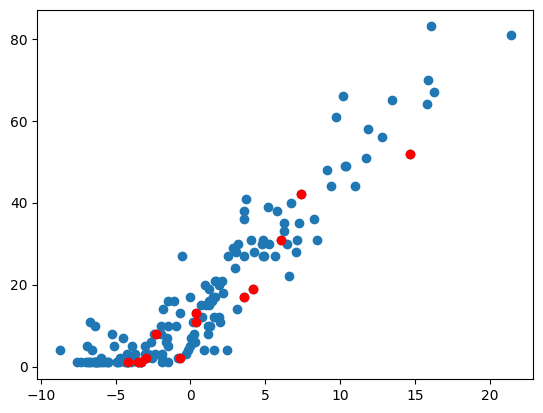

In [1294]:
#res['wins_added']=(res['Total EV']-4.5)*26*70/82
ht['rats'] = ht['wins_added']/ht['Salary']
#ht['rats']= ht['rats']-ht['rats'].mean()
ht.set_index('PLAYER').sort_values(['wins_added', 'Salary',], ascending=False).iloc[:, -3:]
plt.scatter(ht['wins_added'], ht['Salary'])
plt.scatter(res['Total EV'], res['Cost'], color='red')
plt.show()

In [1267]:
res.sum()

Cost        200.000000
Total EV     50.427317
dtype: float64

In [159]:
ht['ratio'] = ht['TOTAL']/ ht['VALUED AT']
ht.sort_values('ratio', ascending=False)

PLAYER    POS TEAM  GP   MPG  TOTAL  VALUED AT  Y! AVG  \
R#                                                                              
101            Brandon Ingram  SF,PF  NOP  62  34.1    1.2        5.0    16.9   
102        Michael Porter Jr.  SF,PF  DEN  61  31.4    1.2        5.0    11.9   
100              Aaron Gordon  SF,PF  DEN  76  31.7    1.2        5.0     3.0   
92                 Al Horford   PF,C  BOS  67  27.1    1.4        6.0     4.5   
91               Jakob Poeltl      C  SAS  68  28.7    1.4        6.0    10.1   
90               Kelly Olynyk      C  UTA  70  26.0    1.4        6.0     1.7   
89           D'Angelo Russell  PG,SG  MIN  65  32.0    1.4        6.0     9.7   
88                  Tre Jones     PG  SAS  71  30.0    1.4        6.0     3.3   
87         Isaiah Hartenstein      C  NYK  69  21.1    1.4        6.0     1.4   
82            Robert Williams      C  BOS  50  28.4    1.6        7.0    17.5   
84             Gary Trent Jr.  PG,SG  TOR  70  35.0    1.6        7.0     4.8   
83                Jalen Smith   PF,C  IND  72  28.1    1.6        7.0     4.4   
75               Monte Morris     PG  WAS  72  28.0    1.8        8.0     3.9   
76                Brook Lopez      C  MIL  70  26.7    1.8        8.0     2.1   
77                 OG Anunoby  SG,SF  TOR  67  36.0    1.8        8.0    13.8   
78           Robert Covington  SF,PF  LAC  72  26.0    1.8        8.0     1.7   
103            Gordon Hayward  SF,PF  CHA  60  32.2    1.1        5.0     3.2   
104         Jarred Vanderbilt     PF  UTA  70  28.0    1.1        5.0     1.9   
73                Tyler Herro  PG,SG  MIA  68  33.3    2.2       10.0     7.7   
72               Jerami Grant     PF  POR  70  33.9    2.2       10.0     6.8   
71                Buddy Hield  SG,SF  IND  78  30.4    2.2       10.0     5.6   
54                Ivica Zubac      C  LAC  76  28.0    3.5       16.0     4.5   
69               JaVale McGee      C  DAL  76  22.2    2.4       11.0     1.4   
53                Evan Mobley   PF,C  CLE  70  34.8    3.7       17.0    24.0   
52             Scottie Barnes  SF,PF  TOR  74  35.4    3.7       17.0    20.0   
51               Tyrese Maxey  PG,SG  PHI  74  35.4    3.7       17.0    11.8   
95            Harrison Barnes  SF,PF  SAC  77  31.6    1.3        6.0     2.4   
93               Bobby Portis   PF,C  MIL  72  26.6    1.3        6.0     2.6   
65        Dorian Finney-Smith  SF,PF  DAL  80  32.1    2.6       12.0     2.7   
64              Devin Vassell  SG,SF  SAS  71  31.3    2.6       12.0     6.6   
63             Alperen Sengun      C  HOU  76  30.1    2.6       12.0    11.4   
62                CJ McCollum  PG,SG  NOP  69  34.7    2.6       12.0    17.2   
94               Clint Capela      C  ATL  72  26.9    1.3        6.0     8.0   
98              Klay Thompson  SG,SF  GSW  69  30.4    1.3        6.0     8.4   
96               Jamal Murray  PG,SG  DEN  62  30.5    1.3        6.0     8.6   
99                Ben Simmons     PG  BRO  68  33.1    1.3        6.0     9.0   
97         Wendell Carter Jr.   PF,C  ORL  66  30.3    1.3        6.0     8.1   
47         Kristaps Porzingis   PF,C  WAS  60  29.4    4.1       19.0    21.4   
60                 Kyle Lowry     PG  MIA  65  34.2    2.8       13.0     3.2   
59              Julius Randle     PF  NYK  72  34.6    2.8       13.0    13.2   
45               Jimmy Butler  SF,PF  MIA  58  33.9    4.3       20.0    31.6   
86             Draymond Green   PF,C  GSW  64  28.8    1.5        7.0     8.2   
85             Christian Wood   PF,C  DAL  72  29.6    1.5        7.0    13.1   
43            Cade Cunningham  PG,SG  DET  72  33.8    4.5       21.0    28.4   
58                 Saddiq Bey  SF,PF  DET  80  33.4    3.0       14.0     4.6   
57              Jalen Brunson  PG,SG  NYK  77  33.9    3.0       14.0    10.4   
56              PJ Washington   PF,C  CHA  72  30.6    3.0       14.0     4.1   
39              Fred VanVleet     PG  TOR  65  36.7   

In [56]:
player_vars

{'Nikola Jokic': Players_Nikola_Jokic,
 'Kevin Durant': Players_Kevin_Durant,
 'Joel Embiid': Players_Joel_Embiid,
 'James Harden': Players_James_Harden,
 'Trae Young': Players_Trae_Young,
 'Tyrese Haliburton': Players_Tyrese_Haliburton,
 'Giannis Antetokounmpo': Players_Giannis_Antetokounmpo,
 'Jayson Tatum': Players_Jayson_Tatum,
 'LeBron James': Players_LeBron_James,
 'Karl-Anthony Towns': Players_Karl_Anthony_Towns,
 'DeMar DeRozan': Players_DeMar_DeRozan,
 'Luka Doncic': Players_Luka_Doncic,
 'Stephen Curry': Players_Stephen_Curry,
 'Damian Lillard': Players_Damian_Lillard,
 'Devin Booker': Players_Devin_Booker,
 'Bam Adebayo': Players_Bam_Adebayo,
 'Paul George': Players_Paul_George,
 'Anthony Davis': Players_Anthony_Davis,
 'LaMelo Ball': Players_LaMelo_Ball,
 'Darius Garland': Players_Darius_Garland,
 'Khris Middleton': Players_Khris_Middleton,
 'Domantas Sabonis': Players_Domantas_Sabonis,
 'Kyrie Irving': Players_Kyrie_Irving,
 'Jarrett Allen': Players_Jarrett_Allen,
 'Rudy G

In [155]:
aaa=[costsd['Bam Adebayo'], 
costsd['Devin Vassell'],
costsd['De\'Anthony Melton'], 
costsd['Dorian Finney-Smith'],
costsd['Harrison Barnes'], 
costsd['JaVale McGee'],
costsd['Jabari Smith II'], 
costsd['Jae\'Sean Tate'],
costsd['James Harden'], 
costsd['Kyle Lowry'],
costsd['Marcus Smart'], 
costsd['Nikola Jokic'],
costsd['Paul George']]

In [164]:
sum(aaa)

199

In [36]:
pd.set_option('display.max_rows', None)


In [99]:
#aa['ratio']=(aa['Z_Sum']/aa['ProjSalary']).mean()
#aa.sort_values('ratio', ascending=False)

FG_PCT_ADJ  FT_PCT_ADJ      3PTM       PTS       REB       AST        ST  \
138    0.379331   -0.665256 -0.142888  0.237627  0.489450  0.013720  0.518204   
114   -1.200232   -0.104615  0.727162 -0.201958 -0.051593 -0.025516  1.784485   
142    1.985828   -1.280540 -1.433930 -0.298892  1.743957 -1.039117 -1.285288   
106   -0.251756    1.132786  0.460534  0.656923  0.394322 -0.195539 -0.441101   
121   -0.239278   -0.425266  1.330584  0.036995  0.376485 -0.437496  0.940297   
109   -1.499080    1.188333  0.432468  0.275949  0.120828  0.994625 -0.709706   
125   -0.760992    0.230418  0.586831  0.465309 -0.277523 -0.300169  0.633320   
107    0.012648    0.510970  0.516666  0.167744 -0.693710  1.164648 -0.057379   
120   -0.242130    0.321998 -1.055037 -0.359758 -0.717492  1.060018  0.710064   
165   -0.893360    0.954525  0.825393 -0.037396 -0.539126 -0.411338  0.940297   
124   -0.274133    0.381261  1.372683  0.217338 -0.134830 -0.509429  0.211226   
113   -0.113638    0.075448 -1.069070 -0.014853 -0.485616  1.975529  0.710064   
140   -1.158708   -0.310083  2.018204  0.447275 -0.919640 -0.280551  0.633320   
128    1.067118   -2.638066 -1.476029 -0.857954  2.290946  0.118350  0.172854   
149   -0.313731   -0.075741 -0.311285 -0.386809  0.126773 -1.006420  0.825181   
123   -0.539548    0.315268  0.404401  0.147455 -0.325087 -0.385181  0.518204   
126   -1.007374    0.630459  0.123740  0.796688 -0.854239 -0.149764  0.594948   
110   -0.626991    0.071054  0.320203 -0.125313 -0.176449  0.379925 -0.364356   
147    0.031158    0.584479  0.881526 -0.048667 -0.985041  0.111811 -0.402728   
141   -0.318713    0.118085  1.049922 -0.008090 -0.598581 -0.018976 -0.249240   
170   -0.339302    0.193852  0.839426 -0.107279 -0.729383 -0.051673 -0.210868   
116   -0.857374    0.728202  0.488600 -0.301147 -0.634255  0.321070 -0.287612   
184    1.024858   -1.193169 -1.111169 -0.731714  0.608361 -1.058735 -0.978311   
119    0.600678   -0.829953 -0.353384 -0.023870  0.370540 -0.215157 -0.824822   
115   -0.700085   -0.027009 -0.423549 -0.997720 -0.699656  0.412622  2.168207   
211   -1.318004    0.599274  0.460534 -0.247044 -0.033756  0.007181  0.518204   
172    0.662499   -0.210644 -1.153269 -0.952634 -0.866130  1.138491  1.017042   
169   -1.095854    0.199982  0.348269 -0.724952 -0.093211 -0.640216  1.324019   
112   -1.248442    0.892070  0.895559  0.341323 -0.628309 -0.705609 -0.287612   
144    1.183081   -0.094717 -0.381450 -0.059939  0.055427 -0.712149 -1.131800   
118   -0.787131   -0.165629 -0.479682 -0.549118 -1.038551  0.693814 -0.287612   
205   -1.018953    0.425140 -0.128855 -0.305655 -0.836403  0.988085 -0.479473   
145   -0.745590   -0.590336  0.123740 -0.039650 -1.151516  0.739590  0.364715   
166   -1.225797    1.308897  0.488600 -0.163636 -0.735329  0.360307 -0.402728   
111    0.150543    0.016854 -0.451615 -0.497269  0.602416 -1.267995 -0.671334   
162   -1.249475    0.145447  1.428815  0.330052 -0.551017 -0.326326  0.134482   
108   -0.310149    0.685163 -0.241119 -0.251553 -0.729383  0.419161 -0.632961   
132    2.033658   -0.618553 -1.476029 -0.776800  0.067318 -1.006420 -1.400405   
180   -0.118967   -0.428668 -0.591946 -0.819631 -1.151516  0.321070  2.321695   
130   -0.743694   -1.357921  1.218319  0.271441 -0.307251 -0.842936  0.633320   
213   -0.226433    0.235809  0.993790 -0.456692 -0.271577 -0.790621  0.211226   
131   -0.354483    0.114557 -0.030624 -1.078874  0.067318 -0.306708  0.479831   
190   -0.995190    0.081209  0.264071 -0.767783 -0.087266 -0.614058  1.170530   
150    0.784539   -2.139686 -1.476029 -1.022517  1.488299 -0.646755  0.249598   
176   -0.833434   -0.802972 -0.269186 -0.404844  0.537015 -0.757924 -0.134123   
206   -0.773634   -0.207053 -0.227086 -0.925583 -0.717492  0.393003  0.211226   
152   -0.858638    0.608136  0.797327 -0.332707  0.537015 -0.313248 -1.630638   
137    0.165478   -1.065472 -0.465648 -0.188433 -0.241850 -0.836397  0.019365   
186    1.158810   -0.325235 -1.20940